## Real Estate Price Predictor

In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv("boston.csv")
df # study the columns

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
# chas is categorical data
df['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [6]:
df.describe()
# count help us to get null value

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'Price'}>, <Axes: >, <Axes: >]],
      dtype=object)

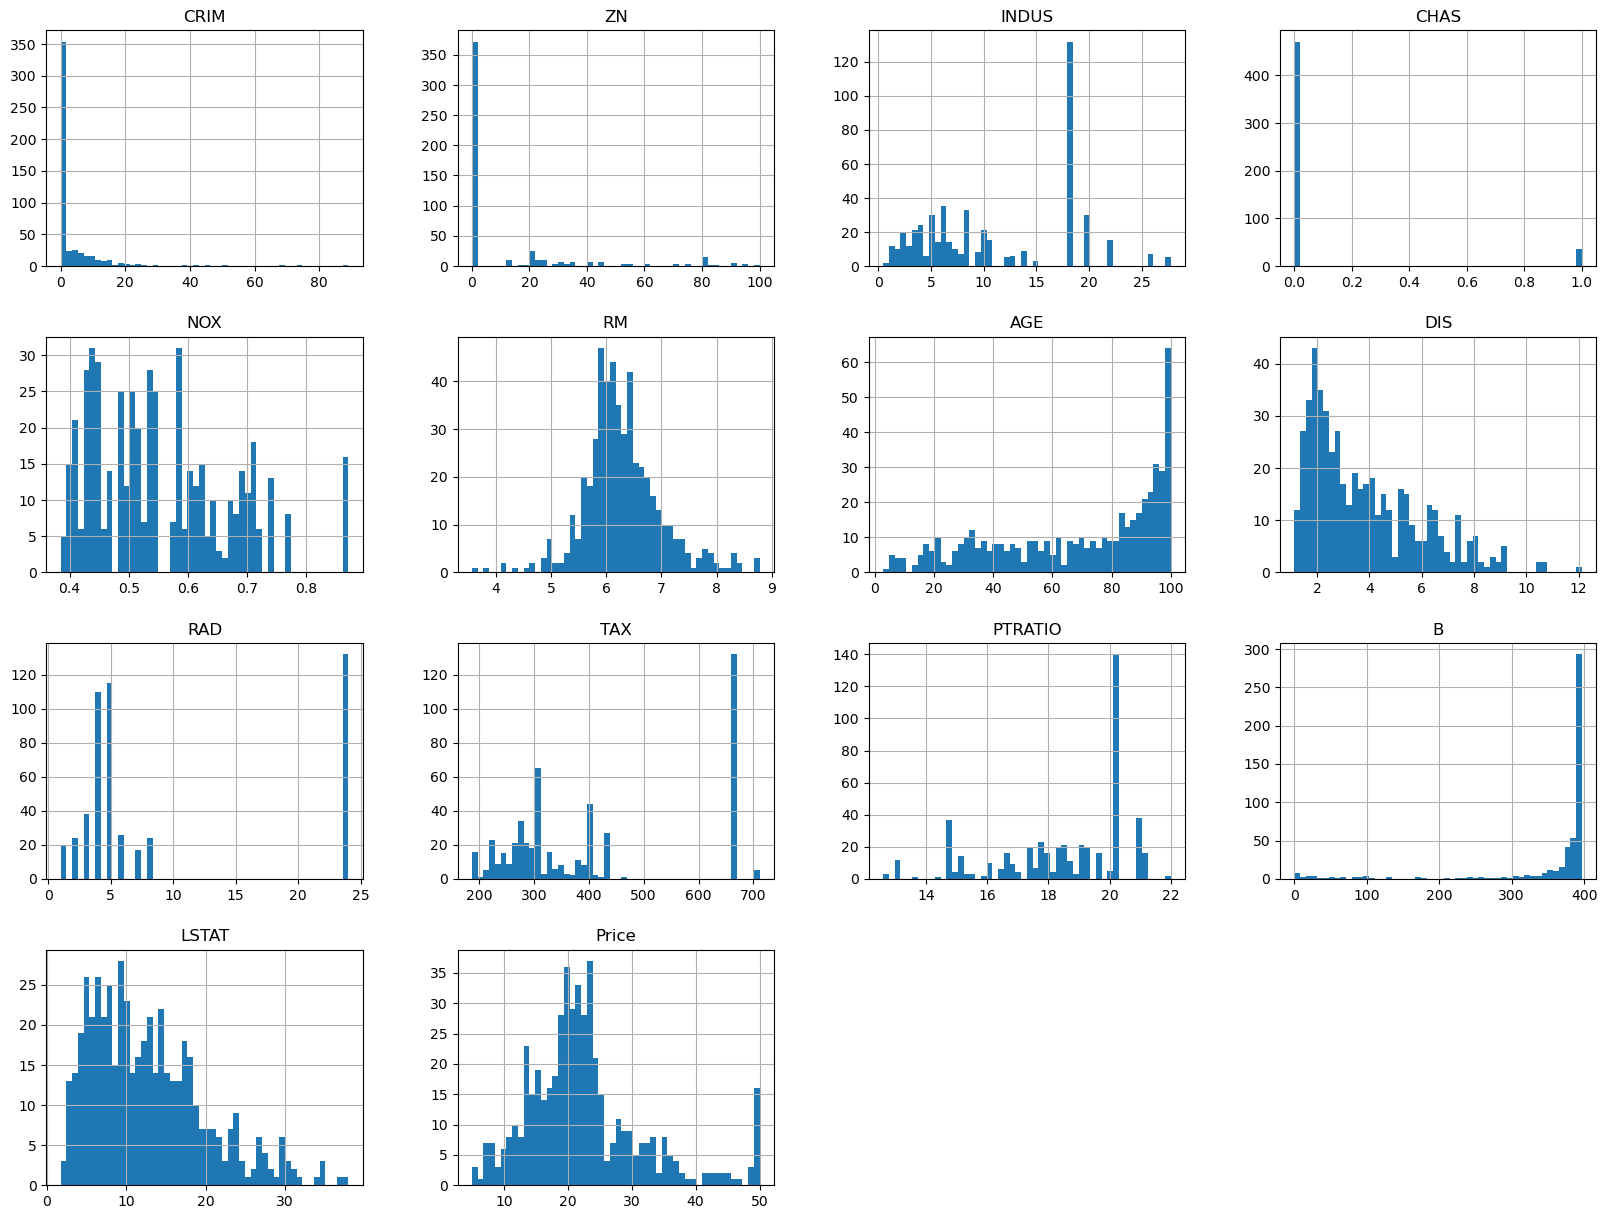

In [7]:
# Histogram
import matplotlib.pyplot as plt
df.hist(bins=50,figsize=(20,15))


## Train-Test Splitting


In [8]:
x=df.iloc[:,:-1]
x.shape

(506, 13)

In [9]:
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [10]:
y=df['Price']
y.shape

(506,)

In [11]:
#train Test split
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(
x, y, test_size=0.2, random_state=42) 

In [12]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((404, 13), (102, 13), (404,), (102,))

In [13]:
x_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
477,15.02340,0.0,18.10,0,0.6140,5.304,97.3,2.1007,24,666,20.2,349.48,24.91
15,0.62739,0.0,8.14,0,0.5380,5.834,56.5,4.4986,4,307,21.0,395.62,8.47
332,0.03466,35.0,6.06,0,0.4379,6.031,23.3,6.6407,1,304,16.9,362.25,7.83
423,7.05042,0.0,18.10,0,0.6140,6.103,85.1,2.0218,24,666,20.2,2.52,23.29
19,0.72580,0.0,8.14,0,0.5380,5.727,69.5,3.7965,4,307,21.0,390.95,11.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0,0.5200,5.836,91.9,2.2110,5,384,20.9,395.67,18.66
270,0.29916,20.0,6.96,0,0.4640,5.856,42.1,4.4290,3,223,18.6,388.65,13.00
348,0.01501,80.0,2.01,0,0.4350,6.635,29.7,8.3440,4,280,17.0,390.94,5.99
435,11.16040,0.0,18.10,0,0.7400,6.629,94.6,2.1247,24,666,20.2,109.85,23.27


In [14]:
# categorical features should be split properly,we use stratified sampling
# let us  take 'CHAS' categorical features
x_train['CHAS'].value_counts(),x_test['CHAS'].value_counts()

(0    375
 1     29
 Name: CHAS, dtype: int64,
 0    96
 1     6
 Name: CHAS, dtype: int64)

In [15]:
#stratified sampling(Proper Ratio)
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for x_train_index,x_test_index in  split.split(df,df['CHAS']):
    strat_train_set=df.loc[x_train_index]
    strat_test_set=df.loc[x_test_index]


In [16]:
strat_train_set['CHAS'].value_counts(),strat_test_set['CHAS'].value_counts()
# not much difference

(0    376
 1     28
 Name: CHAS, dtype: int64,
 0    95
 1     7
 Name: CHAS, dtype: int64)

In [17]:
# now df is train data
df=strat_train_set.copy()

In [18]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.53501,0.0,19.58,1,0.871,6.152,82.6,1.7455,5,403,14.7,88.01,15.02,15.6
423,7.05042,0.0,18.10,0,0.614,6.103,85.1,2.0218,24,666,20.2,2.52,23.29,13.4
98,0.08187,0.0,2.89,0,0.445,7.820,36.9,3.4952,2,276,18.0,393.53,3.57,43.8
455,4.75237,0.0,18.10,0,0.713,6.525,86.5,2.4358,24,666,20.2,50.92,18.13,14.1


In [19]:
df.describe() # before filling the missing attributes

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279908,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609,22.509406
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712983,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740,9.385531
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000,5.000000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500,16.600000
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.210000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000,21.150000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500,25.000000
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000,50.000000


## Looking For Correlations

In [20]:
corr_matrix=df.corr()
corr_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.212927,0.416640,-0.061482,0.430879,-0.257375,0.361890,-0.386900,0.648221,0.603934,0.305603,-0.486869,0.471442,-0.393715
ZN,-0.212927,1.000000,-0.542161,-0.023536,-0.509327,0.293363,-0.565680,0.666939,-0.306480,-0.322803,-0.390570,0.188575,-0.420097,0.339741
INDUS,0.416640,-0.542161,1.000000,0.043686,0.759051,-0.382255,0.644114,-0.708612,0.580908,0.716288,0.384465,-0.368685,0.611068,-0.473516
CHAS,-0.061482,-0.023536,0.043686,1.000000,0.077490,0.100082,0.058388,-0.088081,-0.023005,-0.048802,-0.132682,0.048275,-0.077592,0.205066
NOX,0.430879,-0.509327,0.759051,0.077490,1.000000,-0.300178,0.727358,-0.763623,0.596012,0.659049,0.164977,-0.408434,0.602386,-0.422873
RM,-0.257375,0.293363,-0.382255,0.100082,-0.300178,1.000000,-0.241281,0.206304,-0.199079,-0.281568,-0.329010,0.122469,-0.600731,0.679894
AGE,0.361890,-0.565680,0.644114,0.058388,0.727358,-0.241281,1.000000,-0.734827,0.449489,0.501491,0.259633,-0.287900,0.599211,-0.364596
DIS,-0.386900,0.666939,-0.708612,-0.088081,-0.763623,0.206304,-0.734827,1.000000,-0.481556,-0.530840,-0.215173,0.309222,-0.501408,0.240451
RAD,0.648221,-0.306480,0.580908,-0.023005,0.596012,-0.199079,0.449489,-0.481556,1.000000,0.910932,0.471912,-0.490951,0.479857,-0.374693
TAX,0.603934,-0.322803,0.716288,-0.048802,0.659049,-0.281568,0.501491,-0.530840,0.910932,1.000000,0.473026,-0.475293,0.534228,-0.456657


In [21]:
corr_matrix['Price'].sort_values(ascending=False)

Price      1.000000
RM         0.679894
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: Price, dtype: float64

In [22]:
corr_matrix['Price'].sort_values(ascending=False).index

Index(['Price', 'RM', 'B', 'ZN', 'DIS', 'CHAS', 'AGE', 'RAD', 'CRIM', 'NOX',
       'TAX', 'INDUS', 'PTRATIO', 'LSTAT'],
      dtype='object')

array([[<Axes: xlabel='Price', ylabel='Price'>,
        <Axes: xlabel='RM', ylabel='Price'>,
        <Axes: xlabel='ZN', ylabel='Price'>,
        <Axes: xlabel='LSTAT', ylabel='Price'>],
       [<Axes: xlabel='Price', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='ZN', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>],
       [<Axes: xlabel='Price', ylabel='ZN'>,
        <Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='LSTAT', ylabel='ZN'>],
       [<Axes: xlabel='Price', ylabel='LSTAT'>,
        <Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='ZN', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

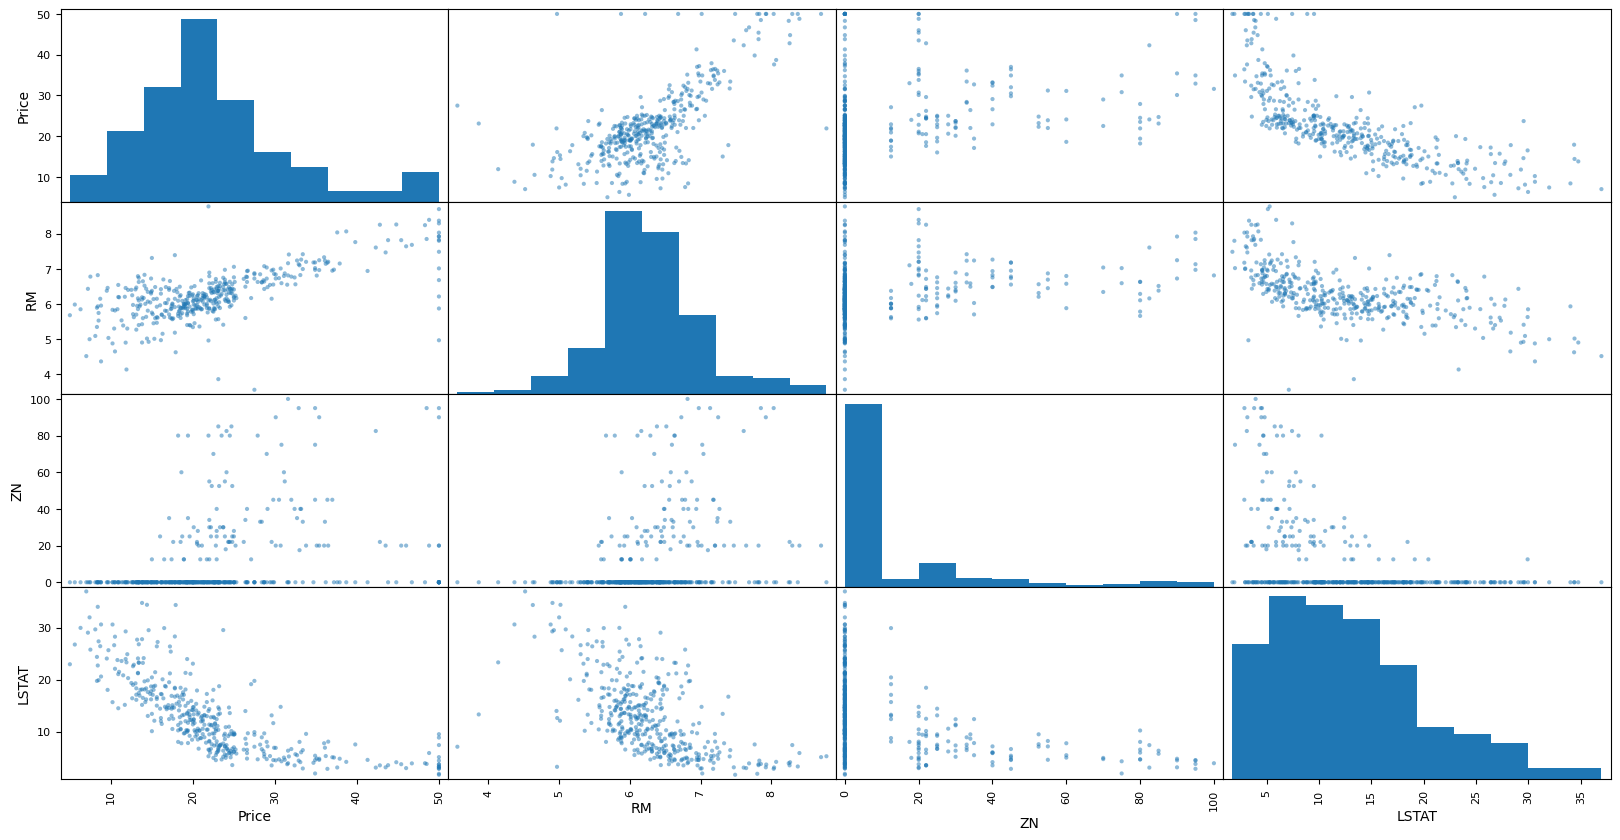

In [23]:
from pandas.plotting import scatter_matrix
attributes=['Price', 'RM', 'ZN','LSTAT']
scatter_matrix(df[attributes],figsize=(20,10))
# Price vs l stat (-ve correlation)

<Axes: xlabel='RM', ylabel='Price'>

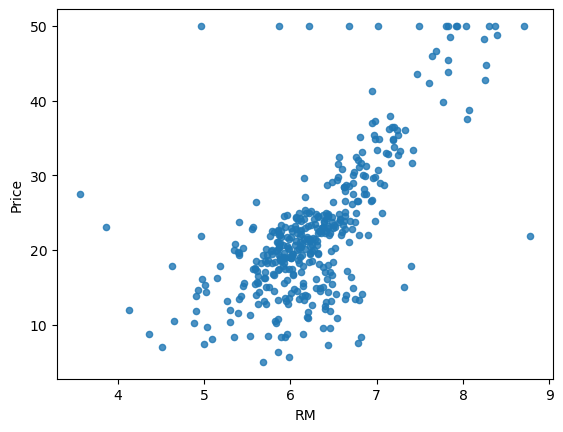

In [24]:
df.plot(kind="scatter",x="RM",y="Price",alpha=0.8)
# Remove outliers
# capping the value at 50

In [25]:
corr_matrix=df.corr()
corr_matrix['Price'].sort_values(ascending=False)
# we are getting a negative correlation


Price      1.000000
RM         0.679894
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: Price, dtype: float64

In [26]:
# Separating the features and values
df= strat_train_set.drop("Price",axis=1)
df_labels=strat_train_set['Price'].copy()

In [27]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.53501,0.0,19.58,1,0.871,6.152,82.6,1.7455,5,403,14.7,88.01,15.02
423,7.05042,0.0,18.10,0,0.614,6.103,85.1,2.0218,24,666,20.2,2.52,23.29
98,0.08187,0.0,2.89,0,0.445,7.820,36.9,3.4952,2,276,18.0,393.53,3.57
455,4.75237,0.0,18.10,0,0.713,6.525,86.5,2.4358,24,666,20.2,50.92,18.13


In [28]:
df_labels

254    21.9
348    24.5
476    16.7
321    23.1
326    23.0
       ... 
155    15.6
423    13.4
98     43.8
455    14.1
216    23.3
Name: Price, Length: 404, dtype: float64

## Missing Attributes

####  If there are any missing attribute , we have 3 options:
- Get rid of missing data points
- Get rid of whole attribute
- Set the value to mean or median or may be zero

In [29]:
# Option 1
#a=df.dropna(subset=['RM'])

# Option 2
#df.dropna("RM",axis=1)

# Option 3
# df['Column_name'].fillna(df['Column_name'].median())

In [30]:
# Automation for filling the nan value with median
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")
imputer.fit(df)


SimpleImputer(strategy='median')

In [31]:
#for all 15 columns (all columns)
imputer.statistics_,imputer.statistics_.shape

(array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
        6.21000e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
        1.90000e+01, 3.90955e+02, 1.15700e+01]),
 (13,))

In [32]:
a=imputer.transform(df) # fills all the nan value(If any) and also transforms
a


array([[4.81900e-02, 8.00000e+01, 3.64000e+00, ..., 1.64000e+01,
        3.92890e+02, 6.57000e+00],
       [1.50100e-02, 8.00000e+01, 2.01000e+00, ..., 1.70000e+01,
        3.90940e+02, 5.99000e+00],
       [4.87141e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.96210e+02, 1.86800e+01],
       ...,
       [8.18700e-02, 0.00000e+00, 2.89000e+00, ..., 1.80000e+01,
        3.93530e+02, 3.57000e+00],
       [4.75237e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        5.09200e+01, 1.81300e+01],
       [4.56000e-02, 0.00000e+00, 1.38900e+01, ..., 1.64000e+01,
        3.92800e+02, 1.35100e+01]])

In [33]:
# creating new data frame 
df_tr=pd.DataFrame(a,columns=df.columns)

In [34]:
df_tr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.04819,80.0,3.64,0.0,0.392,6.108,32.0,9.2203,1.0,315.0,16.4,392.89,6.57
1,0.01501,80.0,2.01,0.0,0.435,6.635,29.7,8.3440,4.0,280.0,17.0,390.94,5.99
2,4.87141,0.0,18.10,0.0,0.614,6.484,93.6,2.3053,24.0,666.0,20.2,396.21,18.68
3,0.18159,0.0,7.38,0.0,0.493,6.376,54.3,4.5404,5.0,287.0,19.6,396.90,6.87
4,0.30347,0.0,7.38,0.0,0.493,6.312,28.9,5.4159,5.0,287.0,19.6,396.90,6.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,3.53501,0.0,19.58,1.0,0.871,6.152,82.6,1.7455,5.0,403.0,14.7,88.01,15.02
400,7.05042,0.0,18.10,0.0,0.614,6.103,85.1,2.0218,24.0,666.0,20.2,2.52,23.29
401,0.08187,0.0,2.89,0.0,0.445,7.820,36.9,3.4952,2.0,276.0,18.0,393.53,3.57
402,4.75237,0.0,18.10,0.0,0.713,6.525,86.5,2.4358,24.0,666.0,20.2,50.92,18.13


## Pipeline Creation

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('std_scaler',StandardScaler()),
])
# we can add more 


In [36]:
df_num_tr=my_pipeline.fit_transform(df_tr)
df_num_tr,df_num_tr.shape  # numpy array
# Predictors will take numpy as input

(array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
          0.41164221, -0.86091034],
        [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
          0.39131918, -0.94116739],
        [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
          0.44624347,  0.81480158],
        ...,
        [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
          0.41831233, -1.27603303],
        [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
         -3.15239177,  0.73869575],
        [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
          0.41070422,  0.09940681]]),
 (404, 13))

In [37]:
# Selecting a Desired model for the Dataset
from sklearn.linear_model import LinearRegression # It is  good for this data, error is 4 
from sklearn.tree import DecisionTreeRegressor # error is zero , i.e. over fitting
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(df_num_tr,df_labels)


RandomForestRegressor()

In [38]:
# we will take some data
some_data=df.iloc[:5]
some_labels=df_labels.iloc[:5]

In [39]:
prepared_data=my_pipeline.transform(some_data)

In [40]:
model.predict(prepared_data)

array([22.356, 25.425, 16.539, 23.231, 23.574])

In [41]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

## Evaluating the model

In [42]:
# Rmse
from sklearn.metrics import mean_squared_error
df_prediction=model.predict(df_num_tr)
mse=mean_squared_error(df_labels,df_prediction)
rmse=np.sqrt(mse)


In [43]:
rmse

1.266382212610332

# Using cross validation

In [44]:
# model = Decision tree regressor
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,df_num_tr,df_labels,scoring="neg_mean_squared_error",cv=10)
rmse_scores=np.sqrt(-scores)
rmse_scores
# we are getting 2,3 better than 4 
# also check with linear regression to check the difference


array([2.77599531, 2.97678955, 4.38828508, 2.6193167 , 3.40446041,
       2.67397168, 4.84933703, 3.36921773, 3.52412176, 3.17079826])

In [45]:
def print_scores(scores):
    print("Scores:",scores)
    print("Mean:" ,scores.mean())
    print("Standard Deviation:" ,scores.std())


In [46]:
print_scores(rmse_scores) # random forest is the best out of 3

Scores: [2.77599531 2.97678955 4.38828508 2.6193167  3.40446041 2.67397168
 4.84933703 3.36921773 3.52412176 3.17079826]
Mean: 3.375229351653295
Standard Deviation: 0.6960696060172447


In [47]:
# Saving the model
import joblib
from joblib import dump,load
dump(model,"Realestate.joblib")

['Realestate.joblib']

In [48]:
load("Realestate.joblib")

RandomForestRegressor()

In [49]:
# Testing the model on test data
x_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
173,0.09178,0.0,4.05,0,0.510,6.416,84.1,2.6463,5,296,16.6,395.50,9.04
274,0.05644,40.0,6.41,1,0.447,6.758,32.9,4.0776,4,254,17.6,396.90,3.53
491,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711,20.1,390.11,18.07
72,0.09164,0.0,10.81,0,0.413,6.065,7.8,5.2873,4,305,19.2,390.91,5.52
452,5.09017,0.0,18.10,0,0.713,6.297,91.8,2.3682,24,666,20.2,385.09,17.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,18.81100,0.0,18.10,0,0.597,4.628,100.0,1.5539,24,666,20.2,28.79,34.37
436,14.42080,0.0,18.10,0,0.740,6.461,93.3,2.0026,24,666,20.2,27.49,18.05
411,14.05070,0.0,18.10,0,0.597,6.657,100.0,1.5275,24,666,20.2,35.05,21.22
86,0.05188,0.0,4.49,0,0.449,6.015,45.1,4.4272,3,247,18.5,395.99,12.86


In [50]:
y_test

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
       ... 
412    17.9
436     9.6
411    17.2
86     22.5
75     21.4
Name: Price, Length: 102, dtype: float64

In [51]:
x_test_prepared=my_pipeline.transform(x_test)

In [52]:
final_predictions=model.predict(x_test_prepared)
final_mse=mean_squared_error(y_test,final_predictions)
final_rmse=np.sqrt(final_mse)
print(final_rmse)
## good Prediction

1.3445476096106828


In [53]:
prepared_data[0] # ive it in model_usage as input

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24141041, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])